In [39]:
import numpy as np
import mxnet as mx


seed = 113

neg_test = np.load('aclImdb/bow_neg_test_sentences_batch.npy')
pos_test = np.load('aclImdb/bow_pos_test_sentences_batch.npy')
neg_train = np.load('aclImdb/bow_neg_train_sentences_batch.npy')
pos_train = np.load('aclImdb/bow_pos_train_sentences_batch.npy')
neg_test_label = np.zeros(len(neg_test))
pos_test_label = np.ones(len(pos_test))
neg_train_label = np.zeros(len(neg_train))
pos_train_label = np.ones(len(pos_train))

x_data = np.concatenate([pos_train, neg_train])
x_label = np.concatenate([pos_train_label, neg_train_label])

y_data = np.concatenate([pos_test, neg_test])
y_label = np.concatenate([pos_test_label, neg_test_label])


np.random.seed(seed)
np.random.shuffle(x_data)
np.random.seed(seed)
np.random.shuffle(x_label)

In [40]:
import numpy as np
def pad(s, max_len):
    if len(s) < max_len:
        l = max_len - len(s)
        pad_sect = np.full((l), -1)
        s = np.concatenate([s, pad_sect])
    return s

def NormalizeSentences(s, max_len):
    if len(s) >= max_len:
        s = s[0:max_len]
    else:
        s = pad(s, max_len)
    return s

In [41]:
l_array = []
for item in x_data:
    l_array.append(len(item))
a = np.array(l_array)
a.sort()
print(a)

[   4    6    6 ...,  936  955 1440]


In [42]:
import pandas as pd
df = pd.DataFrame(data=a)
df.columns = ['a']
counts = df.groupby('a').size(); counts
df1 = counts.to_frame()
df1.columns = ['col1']
ax1 = np.array(df1.index)
ax2 = df1.as_matrix(['col1'])

#for index, row in df1.iterrows():
#    print("{} {}".format(index, row['col1']))

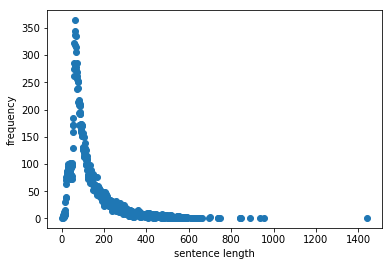

42.2297297297
4359.3931702


In [43]:
import matplotlib.pyplot as plt
plt.scatter(ax1, ax2)

plt.ylabel('frequency')
plt.xlabel('sentence length')
plt.show()
print(ax2.mean())
print(ax2.var())

In [44]:
max_len = 256
i = 0
for item in x_data:
    x_data[i] = NormalizeSentences(item, max_len)